- Handling warnings.

In [1]:
import warnings
warnings.filterwarnings("ignore")

- Load modules.

In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
from common_funtions import *
pd.set_option("display.float_format", "{:.6f}".format)

- Loading embedded information.

In [3]:
df_original_coordinates = pd.read_csv("../data/odors_embedded.csv")
print(df_original_coordinates.shape)
df_original_coordinates.head(2)

(113, 385)


word       p_1       p_2       p_3       p_4       p_5       p_6  \
0  septic -0.053634  0.008882  0.028514 -0.025462 -0.090610 -0.046136   
1  boiled -0.026973 -0.066337 -0.028082  0.114139 -0.047949 -0.057046   

        p_7       p_8       p_9  ...    p_375    p_376    p_377     p_378  \
0 -0.001819  0.079025  0.015717  ... 0.036398 0.030189 0.023783 -0.002196   
1  0.077117 -0.062182 -0.052604  ... 0.066964 0.029938 0.042809 -0.006201   

      p_379     p_380    p_381    p_382    p_383     p_384  
0 -0.025275  0.054594 0.064645 0.011690 0.085835 -0.006902  
1 -0.047204 -0.023041 0.072196 0.061460 0.065978 -0.009908  

[2 rows x 385 columns]

In [4]:
df_original_coordinates.describe()

p_1        p_2        p_3        p_4        p_5        p_6  \
count 113.000000 113.000000 113.000000 113.000000 113.000000 113.000000   
mean   -0.024825   0.001308  -0.002682   0.033373  -0.002849  -0.022657   
std     0.037499   0.044189   0.037843   0.042399   0.056174   0.042732   
min    -0.166085  -0.096496  -0.101065  -0.052734  -0.152758  -0.107205   
25%    -0.043118  -0.029557  -0.028082   0.001872  -0.042684  -0.054411   
50%    -0.023299   0.001602  -0.005462   0.031273  -0.008250  -0.021321   
75%     0.002025   0.027603   0.024013   0.069569   0.043929   0.005001   
max     0.055517   0.105750   0.086404   0.144512   0.128426   0.065212   

             p_7        p_8        p_9       p_10  ...      p_375      p_376  \
count 113.000000 113.000000 113.000000 113.000000  ... 113.000000 113.000000   
mean    0.096207   0.006705   0.001705  -0.020965  ...   0.025565  -0.001714   
std     0.046023   0.048846   0.045244   0.045787  ...   0.048207   0.040337   
min    -0.016175  -0.099119  -0.122729  -0.129767  ...  -0.079288  -0.106251   
25%     0.063605  -0.031219  -0.028135  -0.048355  ...  -0.005059  -0.029735   
50%     0.095921   0.008919   0.000254  -0.016384  ...   0.030272   0.000769   
75%     0.131226   0.042982   0.034049   0.006628  ...   0.058094   0.027937   
max     0.198541   0.149698   0.122681   0.079879  ...   0.130647   0.084783   

           p_377      p_378      p_379      p_380      p_381      p_382  \
count 113.000000 113.000000 113.000000 113.000000 113.000000 113.000000   
mean    0.014421   0.014810  -0.021733   0.011240   0.067792  -0.008822   
std     0.046885   0.040678   0.037894   0.043874   0.056578   0.045512   
min    -0.118209  -0.104962  -0.108367  -0.105472  -0.092729  -0.100006   
25%    -0.007539  -0.007273  -0.047204  -0.016373   0.037572  -0.041344   
50%     0.018041   0.014592  -0.019818   0.015324   0.071504  -0.004589   
75%     0.037019   0.035554   0.003040   0.040505   0.101959   0.019859   
max     0.150823   0.176760   0.091159   0.115698   0.214670   0.097509   

           p_383      p_384  
count 113.000000 113.000000  
mean    0.051077   0.000420  
std     0.058274   0.046190  
min    -0.069202  -0.124552  
25%     0.013327  -0.027540  
50%     0.049941   0.000097  
75%     0.083890   0.033330  
max     0.206846   0.133185  

[8 rows x 384 columns]

- Reduce data components using PCA for looking for explainability and t-SNE for achieving less redundance.

In [5]:
pca_coordinates = PCA(n_components = 50)
df_pca_coordinates = pd.DataFrame(
    pca_coordinates.fit_transform(df_original_coordinates.drop(columns = ["word"])),
    # columns = ["component_1", "component_2", "component_3", "component_4", "component_5"]
    )
cumulative_variance = np.cumsum(pca_coordinates.explained_variance_ratio_)
df_pca_coordinates["word"] = df_original_coordinates["word"]
print(f'Explained variability per principal component: {pca_coordinates.explained_variance_ratio_}')
df_pca_coordinates = df_pca_coordinates[["word"] + [col for col in df_pca_coordinates.columns if col != "word"]]
df_pca_coordinates.head(2)

Explained variability per principal component: [0.0525279  0.04945581 0.04216703 0.03543547 0.03261431 0.03190529
 0.02838602 0.02710198 0.02539808 0.02310396 0.02256585 0.02142628
 0.02045368 0.01984211 0.01920159 0.01834141 0.01731211 0.01672023
 0.01612486 0.01556608 0.01488436 0.01436417 0.01395073 0.01375786
 0.01327256 0.01319138 0.01215307 0.01188483 0.01151608 0.01122741
 0.01090801 0.01070138 0.01045549 0.01006517 0.00978329 0.00945417
 0.00936598 0.00891989 0.00842236 0.00823854 0.00815539 0.00814299
 0.00782989 0.0076422  0.0074363  0.00726188 0.00706142 0.0069006
 0.00669635 0.00641475]


word         0         1         2         3         4         5  \
0  septic  0.044491 -0.184709  0.224127  0.271651 -0.190208  0.341666   
1  boiled -0.186375 -0.271044 -0.120099 -0.199485  0.117167 -0.007575   

          6         7         8  ...        40       41        42       43  \
0 -0.180966 -0.214208 -0.164795  ... -0.039755 0.017518  0.036158 0.098647   
1 -0.015057 -0.043172  0.124052  ... -0.012166 0.137770 -0.044692 0.127485   

        44        45       46       47       48        49  
0 0.044210 -0.087597 0.019648 0.020846 0.066756 -0.102176  
1 0.013693 -0.068623 0.112567 0.047841 0.008135  0.034455  

[2 rows x 51 columns]

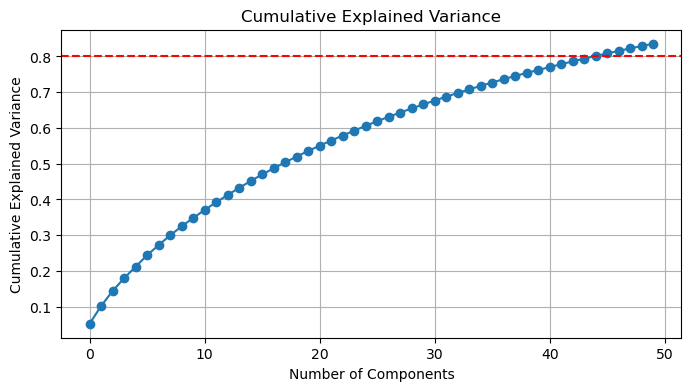

In [6]:
plt.figure(figsize = (8, 4))
plt.plot(range(0,50), cumulative_variance, marker = "o")
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.80, color="r", linestyle="--")  # mark 80%
plt.show()

In [7]:
tsne_2_coordinates = TSNE(random_state = 42).fit_transform(df_original_coordinates.drop(columns = ["word"]))
df_tsne_2_coordinates = pd.DataFrame(data = tsne_2_coordinates, columns = ["tsne_1", "tsne_2"])
df_tsne_2_coordinates["word"] = df_original_coordinates["word"]
df_tsne_2_coordinates = df_tsne_2_coordinates[["word", "tsne_1", "tsne_2"]]
df_tsne_2_coordinates.head(2)

word   tsne_1    tsne_2
0  septic 3.311311 -9.627776
1  boiled 1.921795 -1.702823

In [8]:
tsne_3_coordinates = TSNE(n_components = 3, random_state = 42).fit_transform(df_original_coordinates.drop(columns = ["word"]))
df_tsne_3_coordinates = pd.DataFrame(data = tsne_3_coordinates, columns = ["tsne_1", "tsne_2", "tsne_3"])
df_tsne_3_coordinates["word"] = df_original_coordinates["word"]
df_tsne_3_coordinates = df_tsne_3_coordinates[["word", "tsne_1", "tsne_2", "tsne_3"]]
df_tsne_3_coordinates.head(2)

word     tsne_1     tsne_2     tsne_3
0  septic -69.160172  79.991203  65.838524
1  boiled  47.532967 -18.147669 -28.721771

In [9]:
umap_2_coordinates = umap.UMAP(n_components = 2, random_state = 42).fit_transform(df_original_coordinates.drop(columns = ["word"]))
df_umap_2_coordinates = pd.DataFrame(data = umap_2_coordinates, columns = ["umap_1", "umap_2"])
df_umap_2_coordinates["word"] = df_original_coordinates["word"]
df_umap_2_coordinates = df_umap_2_coordinates[["word", "umap_1", "umap_2"]]
df_umap_2_coordinates.head(2)

word   umap_1    umap_2
0  septic 7.515608  9.812655
1  boiled 7.997895 11.050233

In [10]:
umap_3_coordinates = umap.UMAP(n_components = 3, random_state = 42).fit_transform(df_original_coordinates.drop(columns = ["word"]))
df_umap_3_coordinates = pd.DataFrame(data = umap_3_coordinates, columns = ["umap_1", "umap_2", "umap_3"])
df_umap_3_coordinates["word"] = df_original_coordinates["word"]
df_umap_3_coordinates = df_umap_3_coordinates[["word", "umap_1", "umap_2", "umap_3"]]
df_umap_3_coordinates.head(2)

word    umap_1   umap_2   umap_3
0  septic  8.985312 5.030225 7.883974
1  boiled 10.137798 5.809594 9.972161

- Loading hyperparameter config for default clustering.

In [11]:
with open("../config/hyperparameter_unsupervised_methods.json", "r") as config:
    default_parameters = json.load(config)

In [12]:
default_configs = [
    (AgglomerativeClustering, "AgglomerativeClustering", default_parameters['AgglomerativeClustering']),
    (HDBSCAN, "HDBSCAN", default_parameters['HDBSCAN']),
    (OPTICS, "OPTICS", default_parameters['OPTICS']),
    (SpectralClustering, "SpectralClustering", default_parameters['SpectralClustering']),
    (MeanShift, "MeanShift", default_parameters['MeanShift']),
    (BisectingKMeans, "BisectingKMeans", default_parameters['BisectingKMeans']),
    (Birch, "Birch", default_parameters['Birch']),
    (KMeans, "KMeans", default_parameters['KMeans']),
    (DBSCAN, "DBSCAN", default_parameters['DBSCAN']),
    (AffinityPropagation, "AffinityPropagation", default_parameters['AffinityPropagation']),
]

- Applying preliminar clustering.

In [13]:
models_tested = {}
models_performances = []

for config_parameters in default_configs:
    model, performances = apply_clustering(
        name_method = config_parameters[1],
        dataset = df_original_coordinates.drop(columns = ["word"]),
        **config_parameters[2]
    )
    
    models_tested.update({config_parameters[1]: model})
    models_performances.append(performances)
    
preliminar_performances = pd.DataFrame(models_performances)
preliminar_performances = preliminar_performances.sort_values(by = "silhouette_score", ascending = False)
preliminar_performances.to_csv("../data/preliminar_clustering.csv", index = False)
preliminar_performances

name_method  silhouette_score  davies_bouldin_score  \
9      AffinityPropagation          0.046436              2.493189   
3       SpectralClustering          0.037652              3.022804   
0  AgglomerativeClustering          0.032275              3.245384   
7                   KMeans          0.020906              3.626292   
6                    Birch          0.019460              4.220172   
5          BisectingKMeans          0.016271              3.832879   
2                   OPTICS         -0.012642              2.782425   
1                  HDBSCAN               NaN                   NaN   
4                MeanShift               NaN                   NaN   
8                   DBSCAN               NaN                   NaN   

   calinski_harabasz_score  n_labels  \
9                 2.596549 16.000000   
3                 3.243909  8.000000   
0                 3.110125  8.000000   
7                 2.586227  8.000000   
6                 3.518280  3.000000   
5                 2.483618  8.000000   
2                 2.205191  2.000000   
1                      NaN       NaN   
4                      NaN       NaN   
8                      NaN       NaN   

                                   proportion_labels  
9  {0: 5.31, 1: 4.42, 2: 9.73, 3: 12.39, 4: 4.42,...  
3  {0: 10.62, 1: 18.58, 2: 10.62, 3: 20.35, 4: 10...  
0  {0: 13.27, 1: 28.32, 2: 17.7, 3: 12.39, 4: 12....  
7  {0: 5.31, 1: 11.5, 2: 13.27, 3: 19.47, 4: 14.1...  
6                      {0: 64.6, 1: 24.78, 2: 10.62}  
5  {0: 6.19, 1: 15.04, 2: 15.04, 3: 17.7, 4: 7.96...  
2                               {-1: 94.69, 0: 5.31}  
1                                                NaN  
4                                                NaN  
8                                                NaN

In [14]:
# Test for exploration based on different space of parameters.

dict_1 = {
    "id_test" : 1,
    "name_method" : "AgglomerativeClustering",
    "params" :{
    "n_clusters" : 8, 
    "metric" : "euclidean", 
    "linkage" : "ward"
    }
}

dict_2 = {
    "id_test" : 2,
    "name_method" : "AgglomerativeClustering",
    "params" : {
    "n_clusters" : 4, 
    "metric" : "l1", 
    "linkage" : "average"
    }
}

dict_3 = {
    "id_test" : 3,
    "name_method" : "AgglomerativeClustering",
    "params" : {
    "n_clusters" : 4, 
    "metric" : "l1", 
    "linkage" : "ward"
    }
}

params_test_list = [dict_1, dict_2, dict_3]

df_test_results, models_test_results = run_exploration(df_original_coordinates.drop(columns = ["word"]), params_test_list)
df_test_results

id_test              name_method  silhouette_score  davies_bouldin_score  \
0        1  AgglomerativeClustering          0.032275              3.245384   
1        2  AgglomerativeClustering          0.021404              1.980097   
2        3  AgglomerativeClustering               NaN                   NaN   

   calinski_harabasz_score  n_labels  \
0                 3.110125  8.000000   
1                 1.749251  4.000000   
2                      NaN       NaN   

                                   proportion_labels  
0  {0: 13.27, 1: 28.32, 2: 17.7, 3: 12.39, 4: 12....  
1              {0: 93.81, 1: 1.77, 2: 2.65, 3: 1.77}  
2                                                NaN

In [15]:
clustering_parameters = generate_selected_param_grids()
len(clustering_parameters)

288

- Apply exploration of clustering methods, parameters, and reduction of components.

In [16]:
orig_clustering, orig_models = run_exploration(df_original_coordinates.drop(columns = ["word"]), clustering_parameters)
orig_clustering.to_csv("../data/clustering_original.csv", index = False)

pca_clustering, pca_models = run_exploration(df_pca_coordinates.drop(columns = ["word"]), clustering_parameters)
pca_clustering.to_csv("../data/clustering_pca.csv", index = False)

tsne_2_clustering, tsne_2_models = run_exploration(df_tsne_2_coordinates.drop(columns = ["word"]), clustering_parameters)
tsne_2_clustering.to_csv("../data/clustering_tsne_2.csv", index = False)

tsne_3_clustering, tsne_3_models = run_exploration(df_tsne_3_coordinates.drop(columns = ["word"]), clustering_parameters)
tsne_3_clustering.to_csv("../data/clustering_tsne_3.csv", index = False)

umap_2_clustering, umap_2_models = run_exploration(df_umap_2_coordinates.drop(columns = ["word"]), clustering_parameters)
umap_2_clustering.to_csv("../data/clustering_umap_2.csv", index = False)

umap_3_clustering, umap_3_models = run_exploration(df_umap_3_coordinates.drop(columns = ["word"]), clustering_parameters)
umap_3_clustering.to_csv("../data/clustering_umap_3.csv", index = False)

In [17]:
orig_clustering_1 = orig_clustering.copy()
orig_clustering_1["threshold"] = orig_clustering_1["proportion_labels"].apply(
    lambda dictionary: int(all(value >= 3.0 for value in dictionary.values()))if isinstance(dictionary, dict) else 0
    )
print(f'{(orig_clustering_1["threshold"] == 0).sum()} of {orig_clustering_1.shape[0]} clustering combinations arised at least one cluster with less than 3% of the categories, with the original coordinates.')

pca_clustering_1 = pca_clustering.copy()
pca_clustering_1["threshold"] = pca_clustering_1["proportion_labels"].apply(
    lambda dictionary: int(all(value >= 3.0 for value in dictionary.values()))if isinstance(dictionary, dict) else 0
    )
print(f'{(pca_clustering_1["threshold"] == 0).sum()} of {pca_clustering_1.shape[0]} clustering combinations arised at least one cluster with less than 3% of the categories, applying PCA.')

tsne_2_clustering_1 = tsne_2_clustering.copy()
tsne_2_clustering_1["threshold"] = tsne_2_clustering_1["proportion_labels"].apply(
    lambda dictionary: int(all(value >= 3.0 for value in dictionary.values()))if isinstance(dictionary, dict) else 0
    )
print(f'{(tsne_2_clustering_1["threshold"] == 0).sum()} of {tsne_2_clustering_1.shape[0]} clustering combinations arised at least one cluster with less than 3% of the categories, applying 2D t-SNE.')

tsne_3_clustering_1 = tsne_3_clustering.copy()
tsne_3_clustering_1["threshold"] = tsne_3_clustering_1["proportion_labels"].apply(
    lambda dictionary: int(all(value >= 3.0 for value in dictionary.values()))if isinstance(dictionary, dict) else 0
    )
print(f'{(tsne_3_clustering_1["threshold"] == 0).sum()} of {tsne_3_clustering_1.shape[0]} clustering combinations arised at least one cluster with less than 3% of the categories, applying 3D t-SNE.')

umap_2_clustering_1 = umap_2_clustering.copy()
umap_2_clustering_1["threshold"] = umap_2_clustering_1["proportion_labels"].apply(
    lambda dictionary: int(all(value >= 3.0 for value in dictionary.values()))if isinstance(dictionary, dict) else 0
    )
print(f'{(umap_2_clustering_1["threshold"] == 0).sum()} of {umap_2_clustering_1.shape[0]} clustering combinations arised at least one cluster with less than 3% of the categories, applying 2D UMAP.')

umap_3_clustering_1 = umap_3_clustering.copy()
umap_3_clustering_1["threshold"] = umap_3_clustering_1["proportion_labels"].apply(
    lambda dictionary: int(all(value >= 3.0 for value in dictionary.values()))if isinstance(dictionary, dict) else 0
    )
print(f'{(umap_3_clustering_1["threshold"] == 0).sum()} of {umap_3_clustering_1.shape[0]} clustering combinations arised at least one cluster with less than 3% of the categories, applying 3D UMAP.')

# Keep just those combinations in which all the clusters has 3% or more of the categories
orig_clustering_1 = orig_clustering_1[orig_clustering_1["threshold"] == 1]
pca_clustering_1 = pca_clustering_1[pca_clustering_1["threshold"] == 1]
tsne_2_clustering_1 = tsne_2_clustering_1[tsne_2_clustering_1["threshold"] == 1]
tsne_3_clustering_1 = tsne_3_clustering_1[tsne_3_clustering_1["threshold"] == 1]
umap_2_clustering_1 = umap_2_clustering_1[umap_2_clustering_1["threshold"] == 1]
umap_3_clustering_1 = umap_3_clustering_1[umap_3_clustering_1["threshold"] == 1]

95 of 288 clustering combinations arised at least one cluster with less than 3% of the categories, with the original coordinates.
104 of 288 clustering combinations arised at least one cluster with less than 3% of the categories, applying PCA.
54 of 288 clustering combinations arised at least one cluster with less than 3% of the categories, applying 2D t-SNE.
76 of 288 clustering combinations arised at least one cluster with less than 3% of the categories, applying 3D t-SNE.
30 of 288 clustering combinations arised at least one cluster with less than 3% of the categories, applying 2D UMAP.
45 of 288 clustering combinations arised at least one cluster with less than 3% of the categories, applying 3D UMAP.


In [18]:
orig_clustering_1["silhouette_score_n"] = ((orig_clustering_1["silhouette_score"] - orig_clustering_1["silhouette_score"].min()) / (orig_clustering_1["silhouette_score"].max() - orig_clustering_1["silhouette_score"].min())).round(6)
orig_clustering_1["davies_bouldin_score_n"] = ((orig_clustering_1["davies_bouldin_score"] - orig_clustering_1["davies_bouldin_score"].min()) / (orig_clustering_1["davies_bouldin_score"].max() - orig_clustering_1["davies_bouldin_score"].min())).round(6)
orig_clustering_1["calinski_harabasz_score_n"] = ((orig_clustering_1["calinski_harabasz_score"] - orig_clustering_1["calinski_harabasz_score"].min()) / (orig_clustering_1["calinski_harabasz_score"].max() - orig_clustering_1["calinski_harabasz_score"].min())).round(6)
orig_clustering_1["consensus_clustering_score"] = (0.4 * orig_clustering_1["silhouette_score_n"] - 0.3 * orig_clustering_1["davies_bouldin_score_n"] + 0.3 * orig_clustering_1["calinski_harabasz_score_n"]).round(6)
orig_clustering_1 = orig_clustering_1.sort_values(by = "consensus_clustering_score", ascending = False)
orig_clustering_1.to_csv("../data/clustering_original.csv", index = True)

pca_clustering_1["silhouette_score_n"] = ((pca_clustering_1["silhouette_score"] - pca_clustering_1["silhouette_score"].min()) / (pca_clustering_1["silhouette_score"].max() - pca_clustering_1["silhouette_score"].min())).round(6)
pca_clustering_1["davies_bouldin_score_n"] = ((pca_clustering_1["davies_bouldin_score"] - pca_clustering_1["davies_bouldin_score"].min()) / (pca_clustering_1["davies_bouldin_score"].max() - pca_clustering_1["davies_bouldin_score"].min())).round(6)
pca_clustering_1["calinski_harabasz_score_n"] = ((pca_clustering_1["calinski_harabasz_score"] - pca_clustering_1["calinski_harabasz_score"].min()) / (pca_clustering_1["calinski_harabasz_score"].max() - pca_clustering_1["calinski_harabasz_score"].min())).round(6)
pca_clustering_1["consensus_clustering_score"] = (0.4 * pca_clustering_1["silhouette_score_n"] - 0.3 * pca_clustering_1["davies_bouldin_score_n"] + 0.3 * pca_clustering_1["calinski_harabasz_score_n"]).round(6)
pca_clustering_1 = pca_clustering_1.sort_values(by = "consensus_clustering_score", ascending = False)
pca_clustering_1.to_csv("../data/clustering_pca.csv", index = True)

tsne_2_clustering_1["silhouette_score_n"] = ((tsne_2_clustering_1["silhouette_score"] - tsne_2_clustering_1["silhouette_score"].min()) / (tsne_2_clustering_1["silhouette_score"].max() - tsne_2_clustering_1["silhouette_score"].min())).round(6)
tsne_2_clustering_1["davies_bouldin_score_n"] = ((tsne_2_clustering_1["davies_bouldin_score"] - tsne_2_clustering_1["davies_bouldin_score"].min()) / (tsne_2_clustering_1["davies_bouldin_score"].max() - tsne_2_clustering_1["davies_bouldin_score"].min())).round(6)
tsne_2_clustering_1["calinski_harabasz_score_n"] = ((tsne_2_clustering_1["calinski_harabasz_score"] - tsne_2_clustering_1["calinski_harabasz_score"].min()) / (tsne_2_clustering_1["calinski_harabasz_score"].max() - tsne_2_clustering_1["calinski_harabasz_score"].min())).round(6)
tsne_2_clustering_1["consensus_clustering_score"] = (0.4 * tsne_2_clustering_1["silhouette_score_n"] - 0.3 * tsne_2_clustering_1["davies_bouldin_score_n"] + 0.3 * tsne_2_clustering_1["calinski_harabasz_score_n"]).round(6)
tsne_2_clustering_1 = tsne_2_clustering_1.sort_values(by = "consensus_clustering_score", ascending = False)
tsne_2_clustering_1.to_csv("../data/clustering_tsne_2.csv", index = True)

tsne_3_clustering_1["silhouette_score_n"] = ((tsne_3_clustering_1["silhouette_score"] - tsne_3_clustering_1["silhouette_score"].min()) / (tsne_3_clustering_1["silhouette_score"].max() - tsne_3_clustering_1["silhouette_score"].min())).round(6)
tsne_3_clustering_1["davies_bouldin_score_n"] = ((tsne_3_clustering_1["davies_bouldin_score"] - tsne_3_clustering_1["davies_bouldin_score"].min()) / (tsne_3_clustering_1["davies_bouldin_score"].max() - tsne_3_clustering_1["davies_bouldin_score"].min())).round(6)
tsne_3_clustering_1["calinski_harabasz_score_n"] = ((tsne_3_clustering_1["calinski_harabasz_score"] - tsne_3_clustering_1["calinski_harabasz_score"].min()) / (tsne_3_clustering_1["calinski_harabasz_score"].max() - tsne_3_clustering_1["calinski_harabasz_score"].min())).round(6)
tsne_3_clustering_1["consensus_clustering_score"] = (0.4 * tsne_3_clustering_1["silhouette_score_n"] - 0.3 * tsne_3_clustering_1["davies_bouldin_score_n"] + 0.3 * tsne_3_clustering_1["calinski_harabasz_score_n"]).round(6)
tsne_3_clustering_1 = tsne_3_clustering_1.sort_values(by = "consensus_clustering_score", ascending = False)
tsne_3_clustering_1.to_csv("../data/clustering_tsne_3.csv", index = True)

umap_2_clustering_1["silhouette_score_n"] = ((umap_2_clustering_1["silhouette_score"] - umap_2_clustering_1["silhouette_score"].min()) / (umap_2_clustering_1["silhouette_score"].max() - umap_2_clustering_1["silhouette_score"].min())).round(6)
umap_2_clustering_1["davies_bouldin_score_n"] = ((umap_2_clustering_1["davies_bouldin_score"] - umap_2_clustering_1["davies_bouldin_score"].min()) / (umap_2_clustering_1["davies_bouldin_score"].max() - umap_2_clustering_1["davies_bouldin_score"].min())).round(6)
umap_2_clustering_1["calinski_harabasz_score_n"] = ((umap_2_clustering_1["calinski_harabasz_score"] - umap_2_clustering_1["calinski_harabasz_score"].min()) / (umap_2_clustering_1["calinski_harabasz_score"].max() - umap_2_clustering_1["calinski_harabasz_score"].min())).round(6)
umap_2_clustering_1["consensus_clustering_score"] = (0.4 * umap_2_clustering_1["silhouette_score_n"] - 0.3 * umap_2_clustering_1["davies_bouldin_score_n"] + 0.3 * umap_2_clustering_1["calinski_harabasz_score_n"]).round(6)
umap_2_clustering_1 = umap_2_clustering_1.sort_values(by = "consensus_clustering_score", ascending = False)
umap_2_clustering_1.to_csv("../data/clustering_umap_2.csv", index = True)

umap_3_clustering_1["silhouette_score_n"] = ((umap_3_clustering_1["silhouette_score"] - umap_3_clustering_1["silhouette_score"].min()) / (umap_3_clustering_1["silhouette_score"].max() - umap_3_clustering_1["silhouette_score"].min())).round(6)
umap_3_clustering_1["davies_bouldin_score_n"] = ((umap_3_clustering_1["davies_bouldin_score"] - umap_3_clustering_1["davies_bouldin_score"].min()) / (umap_3_clustering_1["davies_bouldin_score"].max() - umap_3_clustering_1["davies_bouldin_score"].min())).round(6)
umap_3_clustering_1["calinski_harabasz_score_n"] = ((umap_3_clustering_1["calinski_harabasz_score"] - umap_3_clustering_1["calinski_harabasz_score"].min()) / (umap_3_clustering_1["calinski_harabasz_score"].max() - umap_3_clustering_1["calinski_harabasz_score"].min())).round(6)
umap_3_clustering_1["consensus_clustering_score"] = (0.4 * umap_3_clustering_1["silhouette_score_n"] - 0.3 * umap_3_clustering_1["davies_bouldin_score_n"] + 0.3 * umap_3_clustering_1["calinski_harabasz_score_n"]).round(6)
umap_3_clustering_1 = umap_3_clustering_1.sort_values(by = "consensus_clustering_score", ascending = False)
umap_3_clustering_1.to_csv("../data/clustering_umap_3.csv", index = True)

In [19]:
orig_clustering_1.columns

Index(['id_test', 'name_method', 'silhouette_score', 'davies_bouldin_score',
       'calinski_harabasz_score', 'n_labels', 'proportion_labels', 'threshold',
       'silhouette_score_n', 'davies_bouldin_score_n',
       'calinski_harabasz_score_n', 'consensus_clustering_score'],
      dtype='object')

- Results comparison.

In [20]:
clustering_dataframes = {
    "Original coordinates" : orig_clustering_1,
    "PCA" : pca_clustering_1,
    "t-SNE 2D" : tsne_2_clustering_1,
    't-SNE 3D' : tsne_3_clustering_1,
    'UMAP 2D' : umap_2_clustering_1,
    'UMAP 3D' : umap_3_clustering_1
    }

score_columns = [
    'silhouette_score',
    'davies_bouldin_score',
    'calinski_harabasz_score',
    'consensus_clustering_score',
    'n_labels'
    ]

# Create subplots
n_coords = len(clustering_dataframes)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
axes = axes.flatten()

# Heatmap plot for each coordinate system
for ax, (coord_name, df) in zip(axes, clustering_dataframes.items()):
    # Sort by a main score (e.g., silhouette_score_n), descending
    top_df = df.sort_values(by='consensus_clustering_score', ascending = False).head(20)
    
    # Set index as name_method or id_test for better labeling
    top_df.index = top_df['id_test']
    
    # Extract only the selected normalized scores
    heatmap_data = top_df[score_columns]
    
    # Plot heatmap
    sns.heatmap(heatmap_data, ax = ax, cmap = 'coolwarm', annot = True, fmt = ".2f", cbar = False)
    ax.set_title(f'{coord_name} (Top 20)')
    ax.set_xlabel('Scores')
    ax.set_ylabel('Method')

# Adjust layout
plt.tight_layout()
plt.show()

- Results of t-SNE 2D clustering.

In [21]:
coordinates_template = df_tsne_2_coordinates.copy()
coordinates_template = pd.merge(coordinates_template, df_umap_2_coordinates, on = "word")

In [22]:
selected_models_tsne_2d = [
    'spectral_3_nearest_neighbors',
    'spectral_6_nearest_neighbors'
]

clusters_tsne_2d = extract_cluster_labels(coordinates_template, tsne_2_models, selected_models_tsne_2d)
clusters_tsne_2d_dict = extract_clusters(clusters_tsne_2d, selected_models_tsne_2d, save_to_json = True, file_name = "clusters_tsne_2d")

print(clusters_tsne_2d_dict)
clusters_tsne_2d.head(2)

{'spectral_3_nearest_neighbors': {'1': 'septic, boiled, cleaning_materials, food, solvent, synthetic, restaurant, alcohol, baked, cabbage, dead_animal, terpenes, hydrocar, cooked, water, vegetables, chocolate, fecal, sewery, medicinal, fuel, industrial_odours, spices, phenolic, beverage, microbiological, microbial, raw, non-vegetarian, popcorn, ammonia, poultry, non-food_items, waste, grains, aromatic, metallic, chemical, pungent, cloth, dairy, hydrocarbo, bakery, people_&_animals', '2': 'woody, unripe, oriental, characteristic, ylang, plants, sharp, caramel, floral, sulphur, resinous, sulp, ripe, lemon, herbaceous, ozonou, woody_oriental, rancid, chlorinous, non-citrus_fruity, dry_fruit, grassy, ambrosial, hircine, dry_woods, alliaceous, soft_oriental, citrus, fragrant, nature, mossy_woods, vegetation, estery, balsamic, soft_floral, pine', '0': 'marshy, tobacco_smoke, fruity, bland, foul, bitter, green, burnt, smokey, waxy, bloody, salty, fishy, clean, nauseating, musty, sickening, fr

word   tsne_1    tsne_2   umap_1    umap_2 spectral_3_nearest_neighbors  \
0  septic 3.311311 -9.627776 7.515608  9.812655                            1   
1  boiled 1.921795 -1.702823 7.997895 11.050233                            1   

  spectral_6_nearest_neighbors  
0                            3  
1                            1

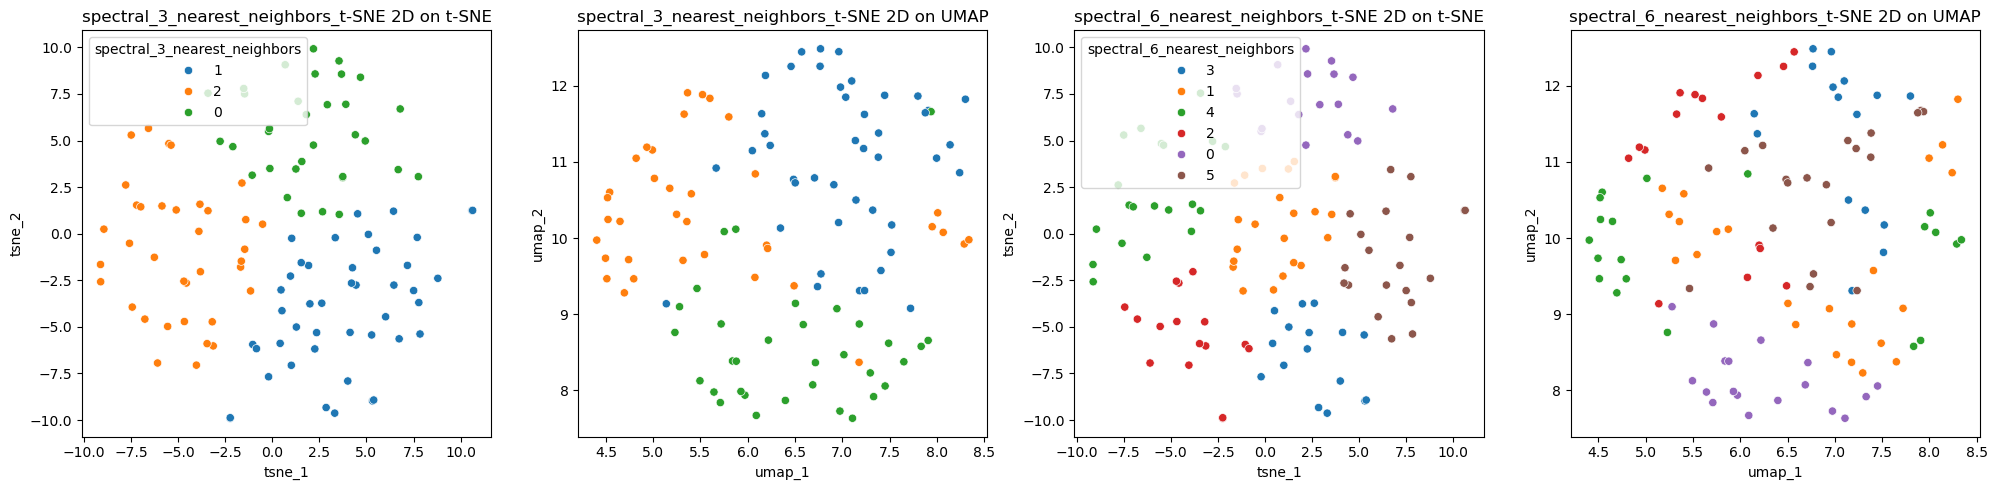

<Figure size 640x480 with 0 Axes>

In [23]:
plot_cluster_projections(clusters_tsne_2d, selected_models_tsne_2d, coordinates = "t-SNE 2D", save_to_png = True, file_name = "clusters_tsne_2d")

In [24]:
selected_models_tsne_3d = tsne_3_clustering_1["id_test"][0:20].tolist()

clusters_tsne_3d = extract_cluster_labels(coordinates_template, tsne_3_models, selected_models_tsne_3d)
clusters_tsne_3d_dict = extract_clusters(clusters_tsne_3d, selected_models_tsne_3d, save_to_json = True, file_name = "clusters_tsne_3d")

print(clusters_tsne_3d_dict)
clusters_tsne_3d.head(2)

{'spectral_4_nearest_neighbors': {'0': 'septic, bland, synthetic, ylang, plants, burnt, lemon, terpenes, clean, water, vegetables, chocolate, fecal, rancid, medicinal, grassy, fuel, other, spices, phenolic, microbiological, poultry, non-food_items, waste, aromatic, estery, pungent, fresh, soft_floral', '1': 'boiled, unripe, foul, bitter, food, solvent, characteristic, sulphur, sulp, green, cabbage, cooked, fried, sewery, chlorinous, sweet, industrial_odours, beverage, raw, non-vegetarian, ammonia, fragrant, lem, nature, metallic, chemical, cloth, balsamic', '3': 'woody, marshy, oriental, cleaning_materials, fruity, sharp, alcohol, ripe, salty, fishy, herbaceous, ozonou, nauseating, sickening, woody_oriental, mol, non-citrus_fruity, dry_fruit, ambrosial, rotten, earthy, dry_woods, alliaceous, microbial, popcorn, coal_tar, grains, nose_feel, gas_station, vegetation, nutty', '2': 'tobacco_smoke, caramel, restaurant, floral, resinous, baked, smokey, waxy, bloody, dead_animal, hydrocar, mus

word   tsne_1    tsne_2   umap_1    umap_2 spectral_4_nearest_neighbors  \
0  septic 3.311311 -9.627776 7.515608  9.812655                            0   
1  boiled 1.921795 -1.702823 7.997895 11.050233                            1   

  kmeans_4_elkan kmeans_4_lloyd spectral_5_nearest_neighbors kmeans_5_elkan  \
0              0              0                            1              4   
1              3              3                            0              3   

   ... kmeans_6_lloyd spectral_7_nearest_neighbors  \
0  ...              4                            0   
1  ...              3                            4   

  spectral_8_nearest_neighbors spectral_3_nearest_neighbors  \
0                            5                            1   
1                            3                            2   

  agglomerative_4_euclidean_ward birch_4_0.3_100 birch_4_0.5_25  \
0                              1               1              1   
1                              0               0              0   

  birch_4_0.5_50 birch_4_0.5_75 birch_4_0.5_100  
0              1              1               1  
1              0              0               0  

[2 rows x 25 columns]

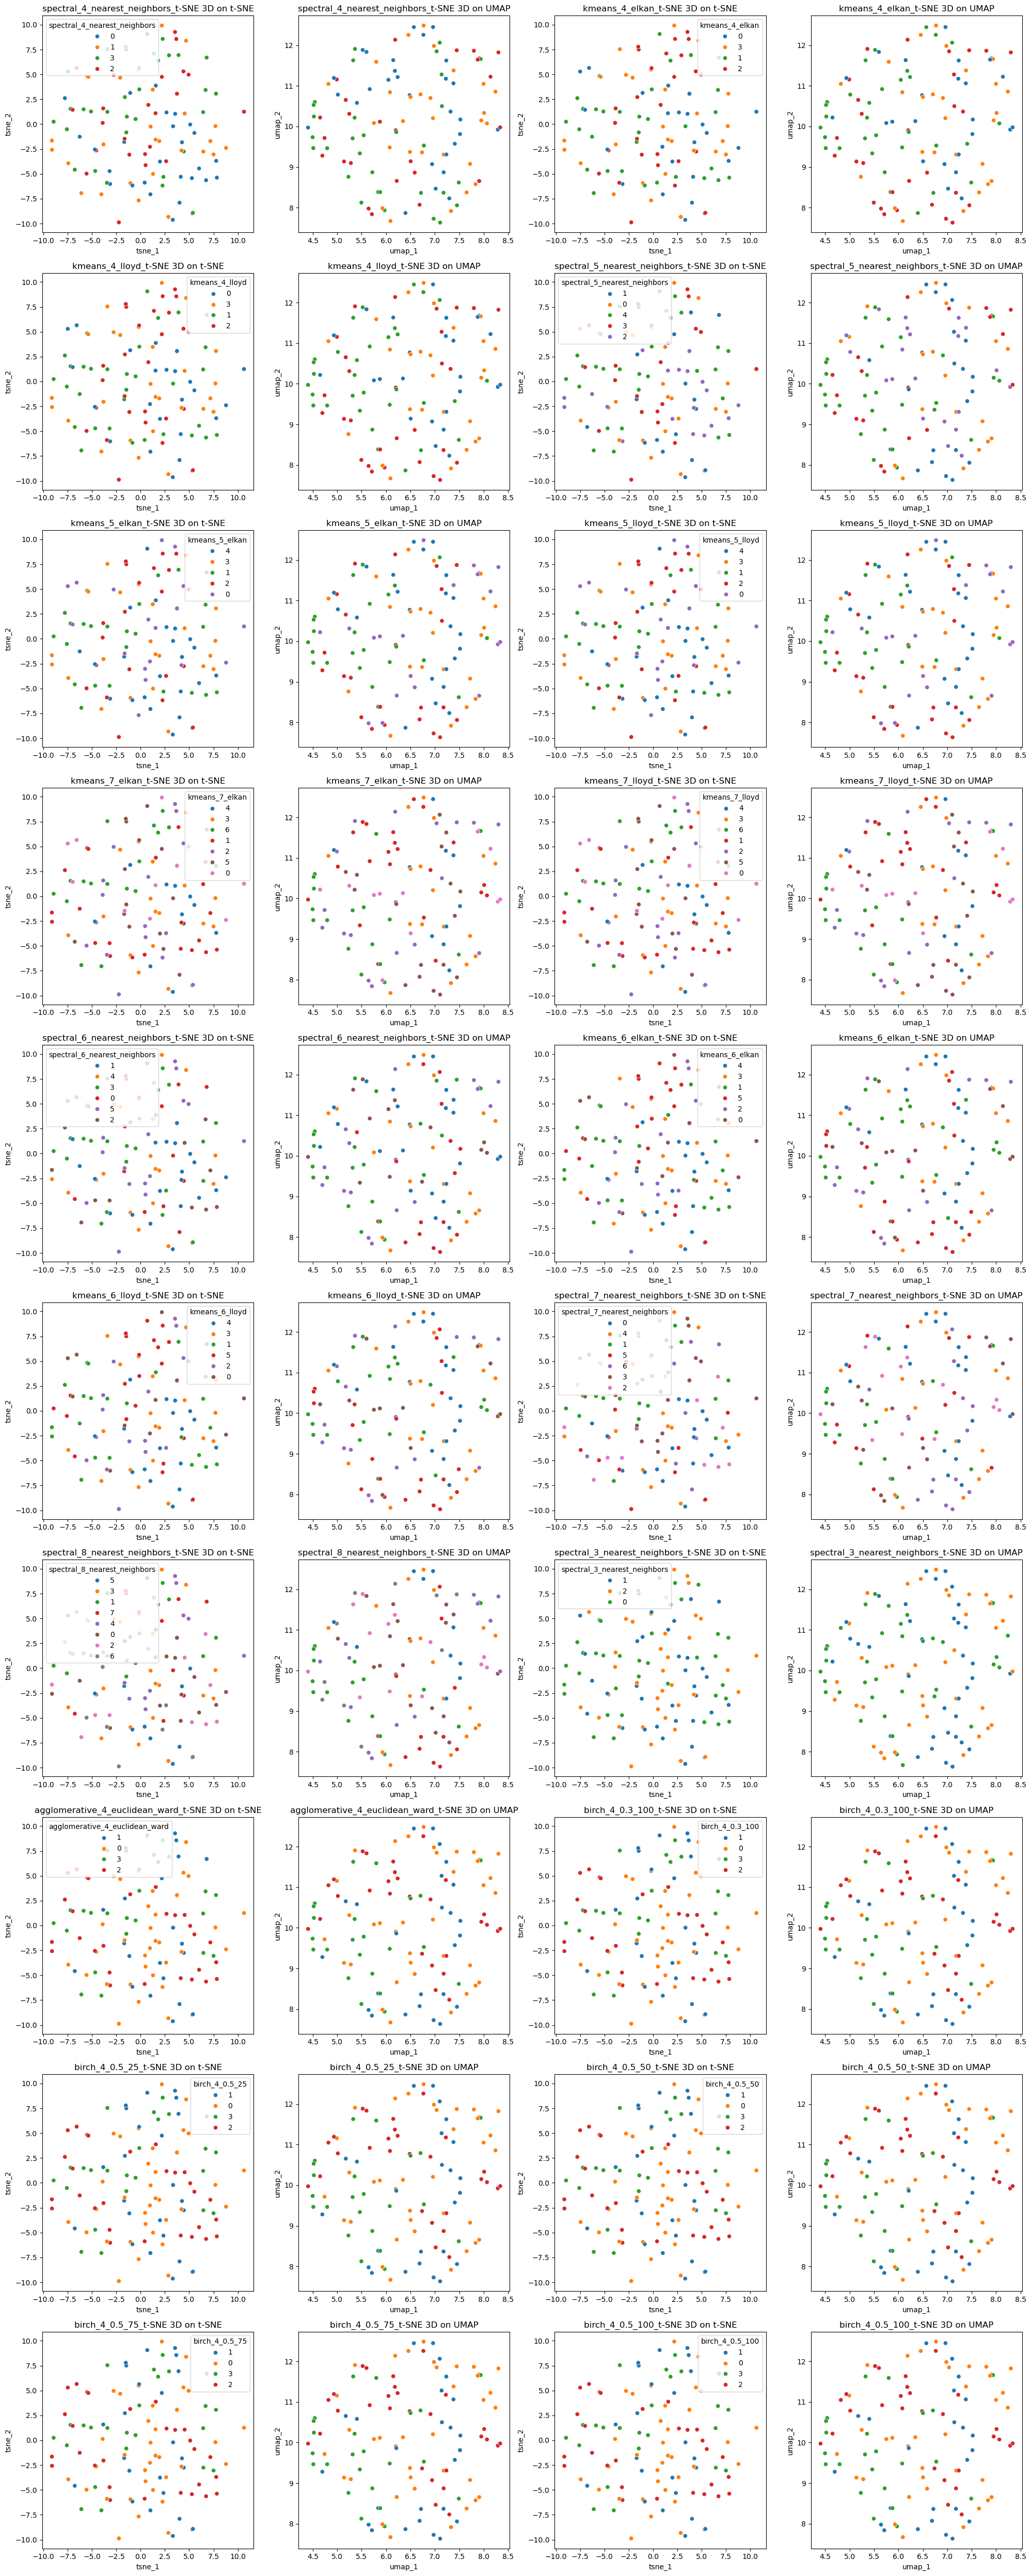

<Figure size 640x480 with 0 Axes>

In [25]:
plot_cluster_projections(clusters_tsne_3d, selected_models_tsne_3d, coordinates = "t-SNE 3D", save_to_png = True, file_name = "clusters_tsne_3d")

In [26]:
selected_models_umap_2d = umap_2_clustering_1["id_test"][0:20].tolist()

clusters_umap_2d = extract_cluster_labels(coordinates_template, umap_2_models, selected_models_umap_2d)
clusters_umap_2d_dict = extract_clusters(clusters_umap_2d, selected_models_umap_2d, save_to_json = True, file_name = "clusters_umap_2d")

print(clusters_umap_2d_dict)
clusters_umap_2d.head(2)

{'affinity_0.5_default': {'1': 'septic, sulphur, sulp, cooked, fecal, rancid, hircine, balsamic', '10': 'boiled, restaurant, baked, hydrocar, chocolate, beverage, gas_station, dairy, hydrocarbo, bakery', '4': 'woody, tobacco_smoke, ylang, dead_animal, woody_oriental, dry_fruit, dry_woods, coal_tar, nose_feel, mossy_woods, pine', '2': 'unripe, cleaning_materials, waxy, clean, dry, sewery, raw, waste, pungent, cloth, fresh', '7': 'marshy, fruity, smokey, fishy, musty, minty, sweet, other, earthy, lem, nutty', '9': 'oriental, caramel, floral, lemon, ozonou, phenolic, ambrosial, soft_oriental, citrus, fragrant, estery, soft_floral', '0': 'bland, foul, bitter, sharp, burnt, bloody, salty, nauseating, sickening, fried, mol, rotten, putrid', '6': 'food, cabbage, vegetables, non-vegetarian, popcorn, poultry, non-food_items, grains, people_&_animals', '5': 'solvent, synthetic, alcohol, water, fuel, industrial_odours, microbiological, microbial, ammonia, chemical', '3': 'characteristic, resinous

word   tsne_1    tsne_2   umap_1    umap_2 affinity_0.5_default  \
0  septic 3.311311 -9.627776 7.515608  9.812655                    1   
1  boiled 1.921795 -1.702823 7.997895 11.050233                   10   

  affinity_0.9_default affinity_0.7_default kmeans_9_elkan kmeans_9_lloyd  \
0                    1                    1              4              4   
1                   10                   10              0              0   

   ... spectral_3_rbf kmeans_10_lloyd kmeans_10_elkan affinity_0.5_-50  \
0  ...              2               4               4                1   
1  ...              1               0               0                0   

  agglomerative_3_euclidean_ward spectral_3_nearest_neighbors kmeans_8_elkan  \
0                              1                            1              4   
1                              0                            1              0   

  kmeans_8_lloyd spectral_9_nearest_neighbors  \
0              4                            2   
1              0                            7   

  agglomerative_3_euclidean_average  
0                                 0  
1                                 0  

[2 rows x 25 columns]

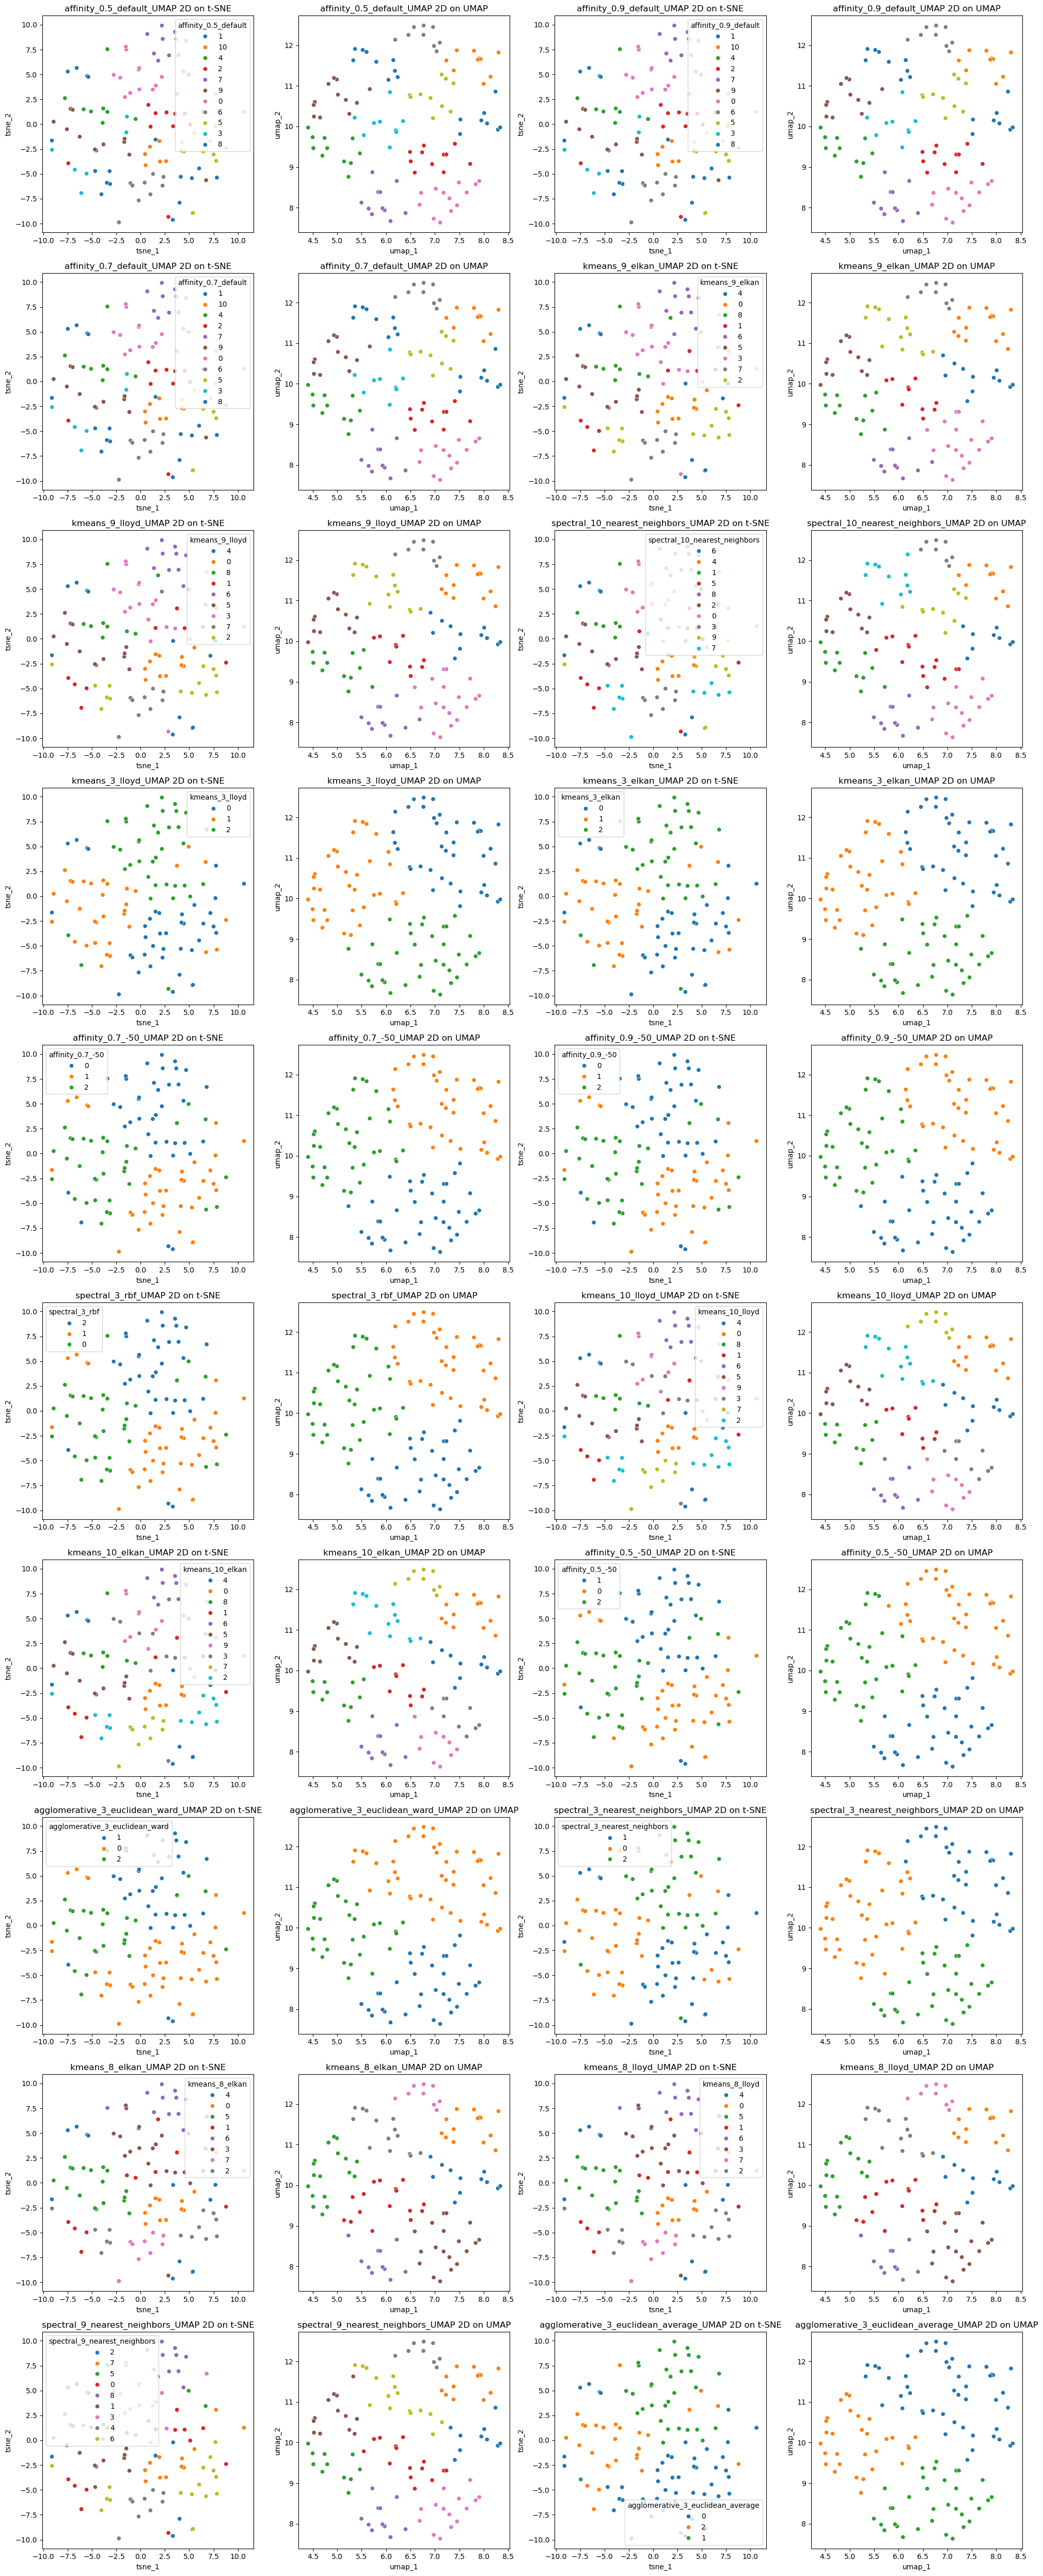

<Figure size 640x480 with 0 Axes>

In [27]:
plot_cluster_projections(clusters_umap_2d, selected_models_umap_2d, coordinates = "UMAP 2D", save_to_png = True, file_name = "clusters_umap_2d")

In [28]:
selected_models_umap_3d = umap_3_clustering_1["id_test"][0:20].tolist()

clusters_umap_3d = extract_cluster_labels(coordinates_template, umap_3_models, selected_models_umap_3d)
clusters_umap_3d_dict = extract_clusters(clusters_umap_3d, selected_models_umap_3d, save_to_json = True, file_name = "clusters_umap_3d")

print(clusters_umap_3d_dict)
clusters_umap_3d.head(2)

{'kmeans_5_lloyd': {'4': 'septic, cleaning_materials, solvent, synthetic, sulphur, resinous, sulp, terpenes, fecal, rancid, medicinal, chlorinous, industrial_odours, hircine, alliaceous, microbiological, microbial, ammonia, aromatic, chemical, balsamic', '0': 'boiled, food, restaurant, alcohol, baked, cabbage, hydrocar, cooked, water, vegetables, chocolate, fuel, beverage, non-vegetarian, popcorn, poultry, non-food_items, coal_tar, grains, gas_station, dairy, hydrocarbo, bakery', '2': 'woody, oriental, characteristic, ylang, plants, caramel, floral, green, ripe, lemon, dead_animal, herbaceous, ozonou, woody_oriental, non-citrus_fruity, dry_fruit, grassy, spices, phenolic, ambrosial, dry_woods, soft_oriental, citrus, fragrant, nature, mossy_woods, vegetation, estery, soft_floral, people_&_animals, pine', '3': 'unripe, bland, foul, bitter, sharp, burnt, waxy, bloody, salty, clean, nauseating, sickening, fried, mol, dry, sewery, rotten, brown, raw, waste, metallic, pungent, cloth, fresh, 

word   tsne_1    tsne_2   umap_1    umap_2 kmeans_5_lloyd kmeans_5_elkan  \
0  septic 3.311311 -9.627776 7.515608  9.812655              4              4   
1  boiled 1.921795 -1.702823 7.997895 11.050233              0              0   

  spectral_5_rbf kmeans_4_lloyd kmeans_4_elkan  ... affinity_0.7_-10  \
0              2              3              3  ...                2   
1              4              0              0  ...                1   

  agglomerative_10_manhattan_complete spectral_6_nearest_neighbors  \
0                                   4                            4   
1                                   3                            2   

  affinity_0.5_-10 kmeans_8_elkan kmeans_8_lloyd kmeans_9_elkan  \
0                3              3              3              3   
1                4              0              0              0   

  kmeans_9_lloyd agglomerative_4_euclidean_complete  \
0              3                                  2   
1              0                                  3   

  agglomerative_4_euclidean_ward  
0                              1  
1                              2  

[2 rows x 25 columns]

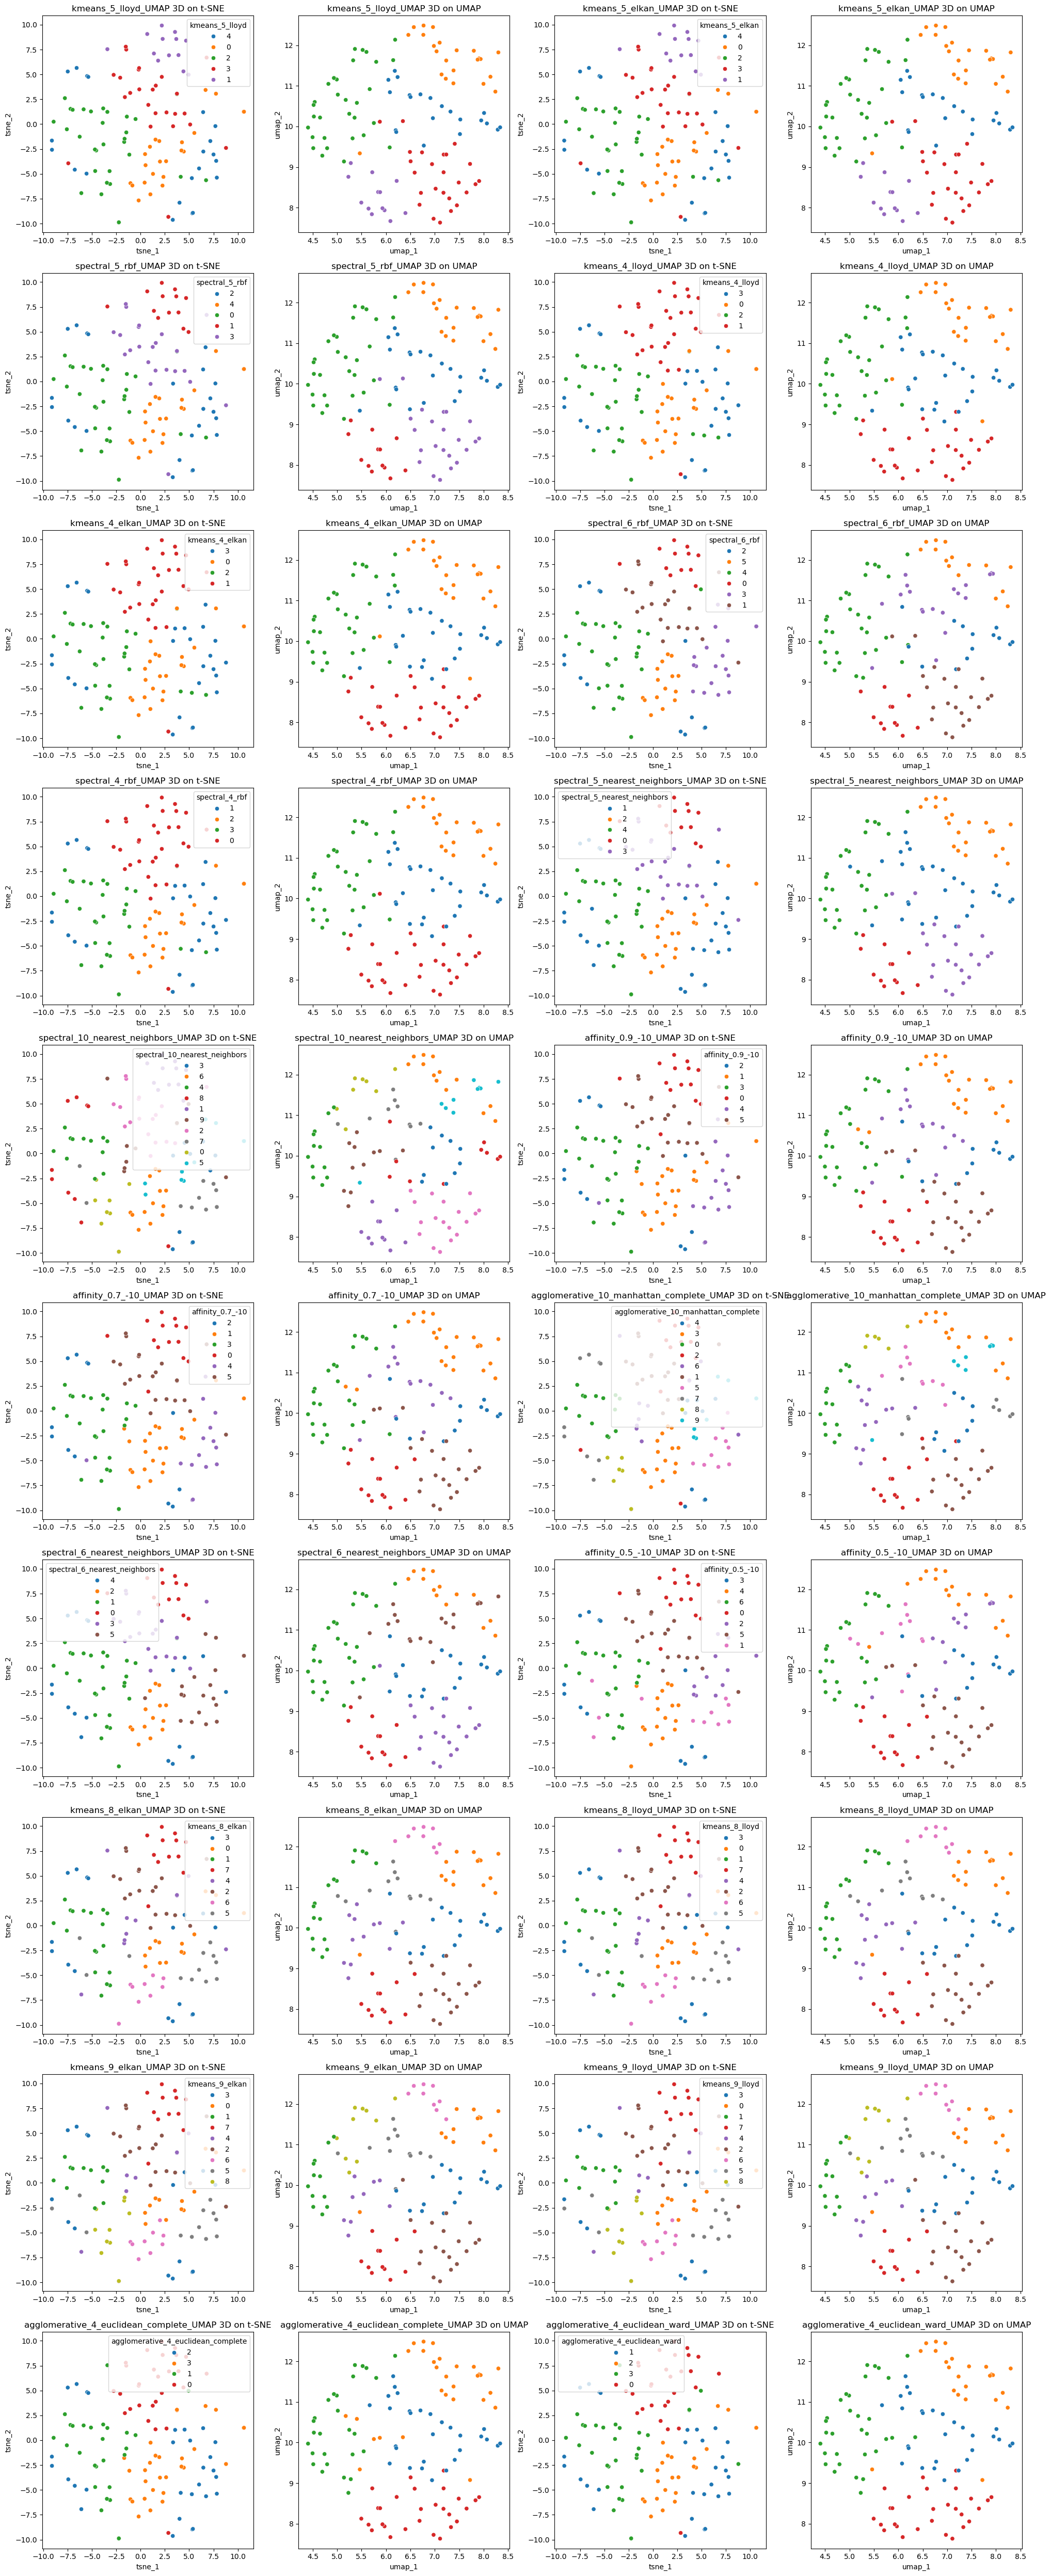

<Figure size 640x480 with 0 Axes>

Exception ignored in: <function ResourceTracker.__del__ at 0x7fbae15ea660>
Traceback (most recent call last):
  File "/scratch/global_1/javellan/miniconda3/envs/chemspace/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/scratch/global_1/javellan/miniconda3/envs/chemspace/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/scratch/global_1/javellan/miniconda3/envs/chemspace/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7f51c524a660>
Traceback (most recent call last):
  File "/scratch/global_1/javellan/miniconda3/envs/chemspace/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/scratch/global_1/javellan/miniconda3/envs/chemspace/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/scratch/global_1/javellan/miniconda3/envs/chemspac

In [30]:
plot_cluster_projections(clusters_umap_3d, selected_models_umap_3d, coordinates = "UMAP 3D", save_to_png = True, file_name = "clusters_umap_3d")